# Game of Fivers

_Combinatorial Optimization course, FEE CTU in Prague. Created by [Industrial Informatics Department](http://industrialinformatics.fel.cvut.cz)._

## Motivation

Riddle: On a square board of size $(n \times n)$ there lie $n^2$ stones. Every stone has two sides - white and black. In the beginning, all stones have the white side facing upwards.

You may turn the stone (white to black or black to white), but if you do that, all the stones in its 4-neighborhood will be turned as well. You want to reach the state in which all the stones have their black sides facing upwards.

What is the minimal number of moves you need to do?

## Input

You are given a positive integer $n \geq 3$, representing the size of the board.

## Model

If we want to model the problem, we need to use several properties of the problem:

**1) Order of the moves is not important.**

<img src="https://rtime.ciirc.cvut.cz/~novakan9/KOA/jupiters/fivers/image_1.png" alt="Order is not important" width="200px"/>

**2) Each stone is selected at most once.**
    
Imagine a sequence of moves:
    
$$
\dots (3,2) \dots (3,2) \dots (3,2) \dots
$$
    
Because the order is not important, we can write
  
$$
\dots (3,2), (3,2), (3,2) \dots
$$
   
It is easy to see, that even number of moves (with a same piece) will cancel the effect.

**3) Color of the top side of the stone depends on the 4-neighbourhood (and the stone itself).**

<img src="https://rtime.ciirc.cvut.cz/~novakan9/KOA/jupiters/fivers/image_2.png" alt="Color depends on 4-neighborhood" width="400"/>


In [32]:
n = 5

In [33]:
!pip install gurobipy
import gurobipy as g

Defaulting to user installation because normal site-packages is not writeable


## Output

You should find a minimal number of moves that need to be done to reach the final states (all stones black). Also, you should provide the moves (e.g., a list of positions of the stones to be turned over).

## Model

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (win64 - Windows 11+.0 (22631.2))

CPU model: 11th Gen Intel(R) Core(TM) i5-1145G7 @ 2.60GHz, instruction set [SSE2|AVX|AVX2|AVX512]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 29 rows, 98 columns and 178 nonzeros
Model fingerprint: 0x4f7ac5f9
Variable types: 0 continuous, 98 integer (49 binary)
Coefficient statistics:
  Matrix range     [1e+00, 2e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+00]
Presolve removed 25 rows and 91 columns
Presolve time: 0.00s
Presolved: 4 rows, 7 columns, 16 nonzeros
Variable types: 0 continuous, 7 integer (7 binary)
Found heuristic solution: objective 15.0000000

Explored 0 nodes (0 simplex iterations) in 0.03 seconds (0.00 work units)
Thread count was 8 (of 8 available processors)

Solution count 1: 15 

Optimal solution found (tolerance 1.00e-04)
Best objective 1.500000000000e+01, best bound 1.

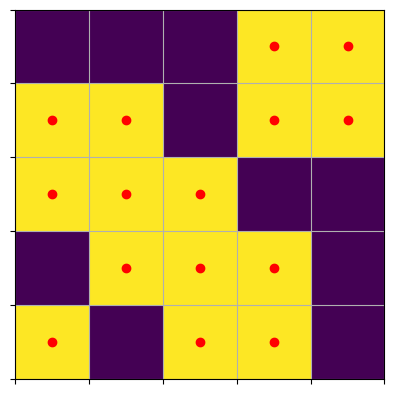

In [35]:
m = g.Model()

stones = m.addVars(n + 2, n + 2, vtype=g.GRB.BINARY)
tmp = m.addVars(n + 2, n + 2, vtype=g.GRB.INTEGER)

for i in range(1, n + 1):
    for j in range(1, n + 1):
        m.addConstr(
            (stones[i, j] + stones[i - 1, j] + stones[i + 1, j] +
             stones[i, j - 1] + stones[i, j + 1]) == 2 * tmp[i, j] + 1)

m.addConstr(stones.sum(0, "*") == 0)
m.addConstr(stones.sum(n+1, "*") == 0)
m.addConstr(stones.sum("*", 0) == 0)
m.addConstr(stones.sum("*", n+1) == 0)

m.setObjective(stones.sum())

m.optimize()

X = []
for i in range(1, n + 1):
    X.append([])
    for j in range(1, n+1):
        X[i-1].append(stones[i, j].x)

visualize(X, n)

 ##  Visualization

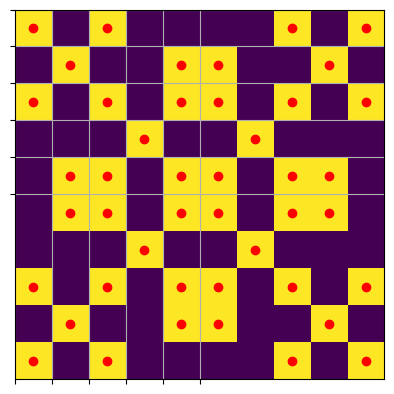

In [34]:
import matplotlib.pyplot as plt
import numpy as np

def visualize(board, n):
    board = np.array(board)
    clicks = np.argwhere(board == 1)
    plt.imshow(board, interpolation='none')
    plt.scatter(clicks[:, 1], clicks[:, 0], c='red')
    plt.gca().set_xticks(np.arange(-0.5, n, 1))
    plt.gca().set_xticklabels([])
    plt.gca().set_yticks(np.arange(-0.5, n, 1))
    plt.gca().set_yticklabels([])
    plt.grid()
    plt.show()

visualize(X, n)

## Additional exercise

- Try to experiment with the model for different values of parameter $n$.
- See, how far is the model scalable (i.e., is it able to solve the problem for n ~ 10, n ~ 100, or even more in a reasonable time?).